In [2]:
import numpy as np
import igraph as ig
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as st

sns.set()

In [2]:
data = pd.read_csv('table_retweets1.csv',nrows=10)

In [3]:
data

,created_at,id_str,user.id,retweeted_status.user.id
0,2013-03-19 10:59:53+00:00,313952961422295040,353934881,NaN
1,2013-03-19 23:00:32+00:00,314134318471593985,419828092,NaN
2,2013-12-12 14:14:54+00:00,411121987369832448,1257609660,NaN
3,2017-05-22 05:47:28+00:00,866515833895473153,264806169,NaN
4,2017-05-25 18:17:39+00:00,867791787007463424,508538467,NaN
5,2017-06-29 08:30:41+00:00,880327646810341377,2878256099,NaN
6,2017-08-21 11:03:36+00:00,899572685264617473,195454642,NaN
7,2017-10-24 12:41:43+00:00,922790204301246464,776465110856589312,NaN
8,2017-12-16 07:26:01+00:00,941917309098168320,410584380,NaN
9,2018-04-06 10:48:19+00:00,982193274319335424,4835674227,NaN


### sistemo database

#### tengo solo i tweet con retweet (tolgo i NaN)

In [2]:
data = pd.read_csv('table_retweets1.csv', low_memory = False)

In [3]:
data_retweet = data[data['retweeted_status.user.id'].isnull() == False].copy()
data_retweet.head()

,created_at,id_str,user.id,retweeted_status.user.id
1249,2020-02-20 08:37:00+00:00,1230395916974247936,369687882,1.007990e+18
1250,2020-02-20 08:37:11+00:00,1230395960221630465,911650004955226113,1.469192e+09
1251,2020-02-20 08:37:24+00:00,1230396015137525761,480544142,3.840013e+07
1252,2020-02-20 08:37:35+00:00,1230396061497413632,1440784603,4.806271e+07
1253,2020-02-20 08:37:45+00:00,1230396104405110786,2305735179,4.855866e+08


####  aggiungo colonna per la data

In [6]:
#columns type
print(type(data.created_at[0]),type(data.id_str[0]), type(data['user.id'][0]),type(data['retweeted_status.user.id']))

<class 'str'> <class 'numpy.int64'> <class 'numpy.int64'> <class 'pandas.core.series.Series'>


In [187]:
#data_retweet['created_at'] = pd.to_datetime(data_retweet['created_at'])
data_retweet['date'] = data_retweet['created_at'].apply(lambda x: x[5:10])
data_retweet.head()

,created_at,id_str,user.id,retweeted_status.user.id,date
1249,2020-02-20 08:37:00+00:00,1230395916974247936,369687882,1.007990e+18,02-20
1250,2020-02-20 08:37:11+00:00,1230395960221630465,911650004955226113,1.469192e+09,02-20
1251,2020-02-20 08:37:24+00:00,1230396015137525761,480544142,3.840013e+07,02-20
1252,2020-02-20 08:37:35+00:00,1230396061497413632,1440784603,4.806271e+07,02-20
1253,2020-02-20 08:37:45+00:00,1230396104405110786,2305735179,4.855866e+08,02-20


### distribuzione retweets giornaieri

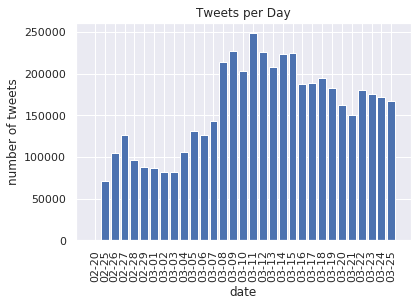

In [8]:
#ragrruppo in base al mese e al giorno
count_per_day = data_retweet.groupby('date',as_index=False).count()

plt.xlabel('date')
plt.ylabel('number of tweets')
plt.title('Tweets per Day')
plt.xticks(count_per_day.index,count_per_day.date, rotation= 'vertical')
plt.bar(count_per_day.index,count_per_day.id_str)
plt.show()

#### aggiungo colonna per contare i giorni

In [188]:
data_retweet['day_count'] = data_retweet.groupby('date').ngroup().values

In [34]:
data_retweet.head()

,created_at,id_str,user.id,retweeted_status.user.id,date,day_count
1249,2020-02-20 08:37:00+00:00,1230395916974247936,369687882,1.007990e+18,02-20,0
1250,2020-02-20 08:37:11+00:00,1230395960221630465,911650004955226113,1.469192e+09,02-20,0
1251,2020-02-20 08:37:24+00:00,1230396015137525761,480544142,3.840013e+07,02-20,0
1252,2020-02-20 08:37:35+00:00,1230396061497413632,1440784603,4.806271e+07,02-20,0
1253,2020-02-20 08:37:45+00:00,1230396104405110786,2305735179,4.855866e+08,02-20,0


#### aggiungo una colonna per i pesi del network

In [192]:
data_retweet['weight'] = 1

In [193]:
data_retweet.to_csv('data_retweet',index=False)

#### costruisco un network di 3 giorni: 20,25,26 febbraio

In [36]:
sub_set = data_retweet[data_retweet.day_count < 3]
sub_set_3_days = sub_set.copy()

In [37]:
#raggruppo i tweet in base a utente del tweet ed utente del retweet, che sono target e source del network
#'retweeted_status.user.id' è l'id di colui che è stato retweetato da 'user.id'
db_for_network = sub_set_3_days.groupby(['retweeted_status.user.id','user.id'], as_index=False).count()

In [38]:
db_for_network.head()

,retweeted_status.user.id,user.id,created_at,id_str,date,day_count,weight
0,45763.0,218488177,1,1,1,1,1
1,394613.0,2002721,1,1,1,1,1
2,394613.0,3015121,1,1,1,1,1
3,394613.0,7830782,1,1,1,1,1
4,394613.0,11198782,1,1,1,1,1


#### tengo solo i link con peso > 1, così da evitare eventuale rumore 

In [39]:
db_for_network = db_for_network[db_for_network.weight > 1].astype(int) #per comodità metto tutti i valori interi, anche per evitar problemi se si usa Graph.DataFrame che trasforma in stringa e ci sarebbero problemi a confrontare str(int) e str(float)
print('numero link della rete:',len(db_for_network))
db_for_network.head()

numero link della rete: 14003


,retweeted_status.user.id,user.id,created_at,id_str,date,day_count,weight
10,394613,169112670,3,3,3,3,3
111,673203,29482112,2,2,2,2,2
122,673203,545448505,2,2,2,2,2
146,814227,40985455,2,2,2,2,2
159,814227,151482583,2,2,2,2,2


#### costruisco il network

In [40]:
#prova per vedere come funziona Graph.DataFrame
aaa_df = pd.DataFrame({'s':[1,2,3,4],'t':[3,4,5,6],'w':[1,2,1,1]})
aaa_df_v = pd.DataFrame({'name' : np.unique(aaa_df.values[:,:2])})

In [41]:
print(aaa_df)
print(aaa_df_v)

   s  t  w
0  1  3  1
1  2  4  2
2  3  5  1
3  4  6  1
   name
0     1
1     2
2     3
3     4
4     5
5     6


In [43]:
# dataframe deve essere in formato stringa altrimenti non funziona
aaa_g = ig.Graph.DataFrame(aaa_df.astype(str),vertices = aaa_df_v)

In [44]:
aaa_g.summary()

'IGRAPH DN-- 6 4 -- \n+ attr: name (v), w (e)'

#### uso TupleList che è più rapido

In [45]:
graph_3_days = ig.Graph.TupleList(db_for_network[['retweeted_status.user.id','user.id','weight']].itertuples(index=False), directed=True, weights=True)

In [130]:
graph_3_days.summary()

'IGRAPH DNW- 7771 14003 -- \n+ attr: name (v), weight (e)'

### Analisi delle misure di centralita

In [133]:
#definisco una funzione per il calcolo delle misure, che restituisca un dataframe 
def centrality_measures(graph, df, weights = None):
    # graph = igraph.Graph object
    # df = pandas.DataFrame object
    df['name'] = graph.vs['name']
    df['betweenness'] = graph.betweenness(weights=weights)
    df['pagerank'] = graph.pagerank(weights=weights)
    df['degree'] = graph.degree()
    df['outdegree'] = graph.outdegree()
    df['local_transitivity'] = graph.transitivity_local_undirected(mode = 'zero',weights=weights)
    if graph.is_simple():
        df['knn'] = graph.knn(weights=weights)
    return df

In [134]:
measures_3_days = centrality_measures(graph_3_days,pd.DataFrame(),weights ='weight')
measures_3_days.head()

,name,betweenness,pagerank,degree,outdegree,local_transitivity
0,394613,0.0,0.000099,1,1,0.0
1,169112670,0.0,0.000183,1,0,0.0
2,673203,0.0,0.000099,2,2,0.0
3,29482112,0.0,0.000141,1,0,0.0
4,545448505,0.0,0.000141,1,0,0.0


#### analisi in periodi più lunghi, una settimana, un mese

#### Costruisco un funzione che automatizzi il processo

In [5]:
def graph(fini_day,init_day = 0):
    sub_set = data_retweet[(data_retweet.day_count >= init_day)&(data_retweet.day_count < fini_day)]
    db_for_network = sub_set.groupby(['retweeted_status.user.id','user.id'], as_index=False).count()
    db_for_network = db_for_network[db_for_network.weight > 1].astype(int)
    return ig.Graph.TupleList(db_for_network[['retweeted_status.user.id','user.id','weight']].itertuples(index=False), directed=True, weights=True)

##### una settimana

In [136]:
measures_7_days = centrality_measures(grap7),pd.DataFrame(),weights ='weight')
measures_7_days.head()

,name,betweenness,pagerank,degree,outdegree,local_transitivity
0,394613,0.0,0.000035,24,24,0.000000
1,2002721,0.0,0.000038,2,0,0.000000
2,16192743,0.0,0.000036,1,0,0.000000
3,29521878,0.0,0.000051,12,0,0.074747
4,54964150,0.0,0.000036,1,0,0.000000


##### un mese

In [137]:
measures_30_days = centrality_measures(graph(30),pd.DataFrame(),weights ='weight')
measures_30_days.head()

,name,betweenness,pagerank,degree,outdegree,local_transitivity
0,22083,0.000000e+00,0.000007,1,1,0.000000
1,70054648,1.317800e+05,0.000184,70,14,0.083783
2,394613,1.911918e+06,0.000012,234,232,0.012486
3,808231,0.000000e+00,0.000009,27,0,0.201450
4,2002721,0.000000e+00,0.000008,23,0,0.066535


##### due sttimane

In [138]:
measures_first_2_week = centrality_measures(graph(14),pd.DataFrame(),weights='weight')
measures_first_2_week.head()

,name,betweenness,pagerank,degree,outdegree,local_transitivity
0,394613,1314.600000,0.000017,119,118,0.008502
1,808231,0.000000,0.000018,11,0,0.211321
2,2002721,0.000000,0.000018,8,0,0.000000
3,9584192,25412.128236,0.000020,54,41,0.113546
4,13056322,0.000000,0.000017,1,0,0.000000


##### ultime due settimane

In [139]:
measures_last_2_week = centrality_measures(graph(15,30),pd.DataFrame(),weights='weight')
measures_last_2_week.head()

InternalError: Error at ../../../source/igraph/src/centrality.c:1632: Weight vector must be positive, Invalid value

In [140]:
sub_set = data_retweet[(data_retweet.day_count >= 15)&(data_retweet.day_count <= 30)]
db_for_network = sub_set.groupby(['retweeted_status.user.id','user.id'], as_index=False).count()
db_for_network = db_for_network[db_for_network.weight > 1].astype(int)
g = ig.Graph.TupleList(db_for_network[['retweeted_status.user.id','user.id','weight']].itertuples(index=False), directed=True, weights=True)

In [144]:
measures_last_2_week = centrality_measures(g,pd.DataFrame(),weights='weight')
measures_last_2_week.head()

,name,betweenness,pagerank,degree,outdegree,local_transitivity
0,394613,231351.505950,0.000018,67,66,0.008589
1,7046912,0.000000,0.000010,4,0,0.000000
2,7697992,146349.759966,0.000011,71,66,0.046981
3,9497072,0.000000,0.000016,43,0,0.088820
4,9831832,0.000000,0.000009,9,0,0.115000


In [79]:
###non ho ben capito cosa è andato storto con la funzione

#### Salvo le misure

In [145]:
measures_3_days.to_csv('measures/measures_3_days',index=False)
measures_7_days.to_csv('measures/measures_7_days',index=False)
measures_30_days.to_csv('measures/measures_30_days',index=False)
measures_first_2_week.to_csv('measures/measures_first_2_week', index= False)
measures_last_2_week.to_csv('measures/measures_last_2_week', index= False)

#### Confronto misure

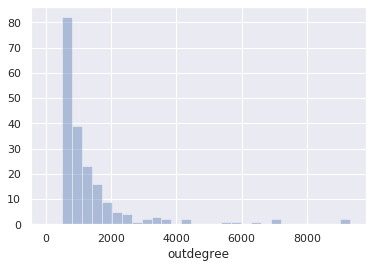

In [103]:
#degree distribution after degree 500
sns.distplot(measures_30_days.outdegree,bins=np.linspace(500,measures_30_days.outdegree.max(),30), kde=False)

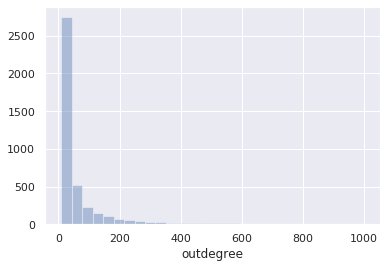

In [113]:
#distribution between 10 and 1000
sns.distplot(measures_30_days.outdegree,bins=np.linspace(10,1000,30),kde=False)

#### guardo gli utenti più retweetati

In [10]:
#guardo i 20 con degree più alto in ogni set di misure
top_20_retweeted = measures_30_days.sort_values('outdegree')['name'].values[-20:]

In [11]:
top_20_retweeted = np.concatenate((top_20_retweeted,measures_3_days.sort_values('outdegree')['name'].values[-20:]))
top_20_retweeted = np.concatenate((top_20_retweeted,measures_7_days.sort_values('outdegree')['name'].values[-20:]))
top_20_retweeted = np.concatenate((top_20_retweeted,measures_first_2_week.sort_values('outdegree')['name'].values[-20:]))
top_20_retweeted = np.concatenate((top_20_retweeted,measures_last_2_week.sort_values('outdegree')['name'].values[-20:]))

In [65]:
from collections import Counter

In [95]:
#conto quali vlori si ripetono --> quali utenti sono presenti in più set
counter = Counter(top_20_retweeted)
counter

Counter({1683455144: 5,
         52424550: 4,
         828717014: 3,
         395218906: 1,
         331617619: 5,
         416476798: 3,
         20423071: 2,
         2971149125: 5,
         1575496556: 2,
         5893702: 4,
         231902290: 4,
         497190015: 2,
         130537001: 3,
         1904010924: 5,
         16476536: 5,
         994453158301786112: 2,
         150725695: 5,
         18935802: 5,
         732817452569141248: 4,
         1100776937004457984: 5,
         2339316667: 1,
         399004979: 1,
         475234937: 2,
         123920914: 1,
         2753154182: 3,
         585968039: 1,
         144210805: 2,
         13514762: 1,
         270839361: 3,
         234787615: 1,
         18762875: 1,
         1023625170509078528: 2,
         406981868: 1,
         337767301: 2,
         895712365756293120: 1,
         47756372: 1,
         51759517: 1,
         25676606: 1})

motli utenti sono presenti in tutti i periodi temporali analizzati

In [14]:
counter_df = pd.DataFrame({'id':list(counter.keys()),'count':list(counter.values())})

In [15]:
#isolo gli id degli utenti più retweetati
id_top_retweeted = counter_df.id.values

#### incorcio col file metadata per capire i nomi degli utenti

In [208]:
pd.read_csv('transfer_41033_files_4cf7ccc6(1)/table_metadata.csv', nrows = 5)

,id_str,text,retweeted_status.id,user.screen_name,user.followers_count,user.location
0,313952961422295040,http://t.co/LqhmyOCsUB | Coronavirus: sarà la ...,NaN,urcaurcait,7,Italia
1,314134318471593985,La prossima pandemia sará scatenata dal corona...,NaN,alle_iccir,521,Purgatorio
2,411121987369832448,Isoliamo il virus del buon senso e diffondiamo...,NaN,AleLinari,212,Romagna
3,866515833895473153,Che sempre più persone credono in teorie bisla...,NaN,AsinoMorto,18035,Generalmente eretta
4,867791787007463424,Mai un'epidemia di intelligenza,NaN,mcomemax,2614,reggio emilia


In [4]:
#aggiunta si lineterminator = '\n' per evitare un errore che si h anel caricamento del file
chunksize = 10**5
meta_data=pd.DataFrame()
for chunk in pd.read_csv('transfer_41033_files_4cf7ccc6(1)/table_metadata.csv', chunksize=chunksize, lineterminator='\n'):
    meta_data = pd.concat([meta_data, chunk])

In [16]:
meta_data[meta_data['retweeted_status.id'].isin(id_top_retweeted)]

,id_str,text,retweeted_status.id,user.screen_name,user.followers_count,user.location


gli id nel file metadata.csv sembrerebbero diversi da quelli del file rewteets.csv, poichè nel primo non compaiono e nel secondo si

In [92]:
data[data['retweeted_status.user.id'].isin(id_top_retweeted)].head()

,created_at,id_str,user.id,retweeted_status.user.id
1275,2020-02-20 08:43:08+00:00,1230397459932774401,2278132116,7.328175e+17
1277,2020-02-20 08:43:42+00:00,1230397601658343426,420977208,7.328175e+17
1299,2020-02-20 08:49:51+00:00,1230399147766927360,1372859420,4.752349e+08
1307,2020-02-20 08:50:56+00:00,1230399422208630784,630644340,1.442108e+08
1308,2020-02-20 08:51:02+00:00,1230399448083288064,3207950973,9.944532e+17


In [37]:
#ricarico le misure calcolate
measures_3_days=pd.read_csv('measures/measures_3_days')
measures_7_days=pd.read_csv('measures/measures_7_days')
measures_30_days=pd.read_csv('measures/measures_30_days')
measures_first_2_week=pd.read_csv('measures/measures_first_2_week')
measures_last_2_week=pd.read_csv('measures/measures_last_2_week')

In [38]:
def norm_betweenness(series):
    n = len(series)
    return series / ((n-1)*(n-2))

In [88]:
measures_3_days['norm_betweenness']=norm_betweenness(measures_3_days['betweenness'])
measures_7_days['norm_betweenness']=norm_betweenness(measures_7_days['betweenness'])
measures_30_days['norm_betweenness']=norm_betweenness(measures_30_days['betweenness'])
measures_first_2_week['norm_betweenness']=norm_betweenness(measures_first_2_week['betweenness'])
measures_last_2_week['norm_betweenness']=norm_betweenness(measures_last_2_week['betweenness'])


([array([4., 3., 5., 6., 6., 0., 3., 1., 3., 1., 1., 1., 0., 0., 1., 2., 0.,
         0., 3., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.]),
  array([12., 21.,  9., 33., 12.,  5.,  7.,  8.,  3.,  6.,  5.,  5.,  5.,
          4.,  2., 17.,  4., 10.,  4.,  9.,  4.,  6.,  1.,  5.,  1.,  0.,
          2.,  3.,  1.]),
  array([165., 115., 286.,  77., 137.,  73.,  50.,  94.,  46.,  43.,  60.,
          30.,  42.,  44., 258.,  83.,  49.,  60.,  43.,  46.,  37.,  30.,
          37.,  32.,  30.,  21.,  22.,  22.,  28.])],
 array([1.00000000e-06, 1.31034483e-06, 1.62068966e-06, 1.93103448e-06,
        2.24137931e-06, 2.55172414e-06, 2.86206897e-06, 3.17241379e-06,
        3.48275862e-06, 3.79310345e-06, 4.10344828e-06, 4.41379310e-06,
        4.72413793e-06, 5.03448276e-06, 5.34482759e-06, 5.65517241e-06,
        5.96551724e-06, 6.27586207e-06, 6.58620690e-06, 6.89655172e-06,
        7.20689655e-06, 7.51724138e-06, 7.82758621e-06, 8.13793103e-06,
        8.44827586e-06, 8.75862069e-06, 9.06896552e-06

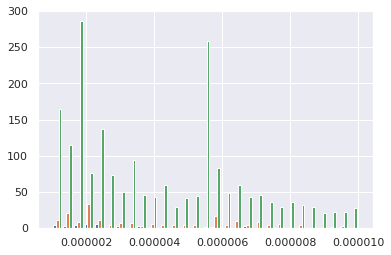

In [83]:
plt.hist([measures_3_days.norm_betweenness,
              measures_7_days.norm_betweenness,
              measures_30_days.norm_betweenness]
             , bins = np.linspace(1e-6,0.1e-4,30))


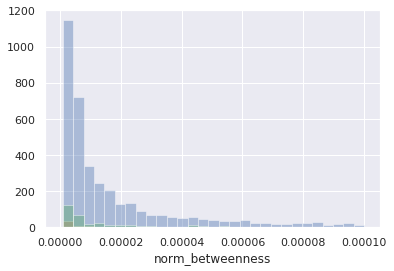

In [87]:
sns.distplot(measures_30_days.norm_betweenness, kde=False, bins=np.linspace(1e-6,1e-4,30))
sns.distplot(measures_3_days.norm_betweenness, kde=False, bins=np.linspace(1e-6,1e-4,30))
sns.distplot(measures_7_days.norm_betweenness, kde=False, bins=np.linspace(1e-6,1e-4,30))

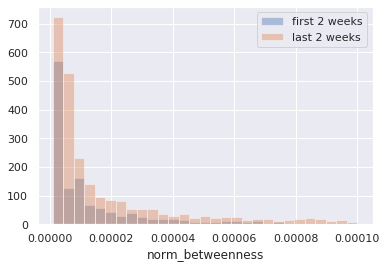

In [91]:
sns.distplot(measures_first_2_week.norm_betweenness, kde=False, bins=np.linspace(1e-6,1e-4,30))
sns.distplot(measures_last_2_week.norm_betweenness, kde=False, bins=np.linspace(1e-6,1e-4,30))
plt.legend(['first 2 weeks', 'last 2 weeks'])

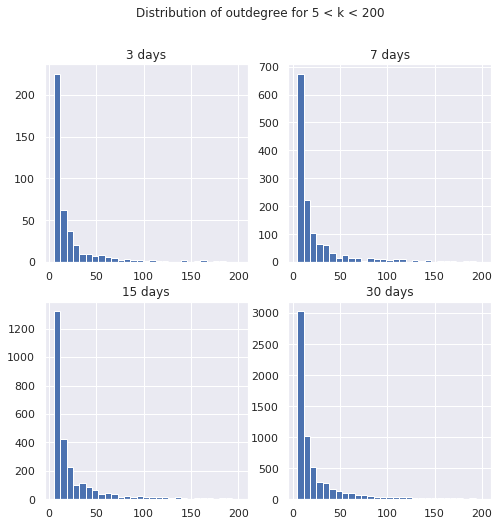

In [122]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2, figsize= (8,8))
fig.suptitle('Distribution of outdegree for 5 < k < 200')
ax1.hist(measures_3_days.outdegree, bins = np.linspace(5,200,30))
ax1.set_title('3 days')
ax2.hist(measures_7_days.outdegree, bins = np.linspace(5,200,30))
ax2.set_title('7 days')
ax3.hist(measures_first_2_week.outdegree, bins = np.linspace(5,200,30))
ax3.set_title('15 days')
ax4.hist(measures_30_days.outdegree, bins = np.linspace(5,200,30))
ax4.set_title('30 days')
plt.show()

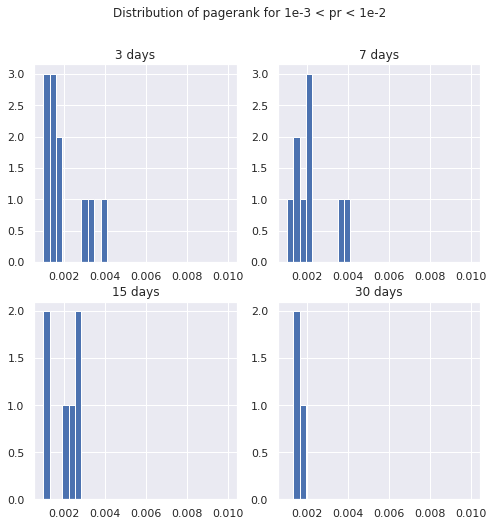

In [133]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2, figsize= (8,8))
fig.suptitle('Distribution of pagerank for 1e-3 < pr < 1e-2')
ax1.hist(measures_3_days.pagerank, bins = np.linspace(1e-3,0.01,30))
ax1.set_title('3 days')
ax2.hist(measures_7_days.pagerank, bins = np.linspace(1e-3,0.01,30))
ax2.set_title('7 days')
ax3.hist(measures_first_2_week.pagerank, bins = np.linspace(1e-3,0.01,30))
ax3.set_title('15 days')
ax4.hist(measures_30_days.pagerank, bins = np.linspace(1e-3,0.01,30))
ax4.set_title('30 days')
plt.show()

### Ricerca dei leader

##### betweenness

In [175]:
top_100_btwn = pd.DataFrame({'30_days' : measures_30_days.sort_values('betweenness')['name'].values[-100:],
                            '15_days' : measures_first_2_week.sort_values('betweenness')['name'].values[-100:],
                            '7_days' : measures_7_days.sort_values('betweenness')['name'].values[-100:],
                            '3_days' : measures_3_days.sort_values('betweenness')['name'].values[-100:]})

In [176]:
top_100_btwn.head()

,30_days,15_days,7_days,3_days
0,52424550,986811270,1007990392279748608,1062799087
1,1575496556,96853674,18935802,156931889
2,69569643,1490509230,804354408,500882938
3,361985955,479810905,861946438439383040,3426504598
4,856216775830253568,547936685,493833883,903898838


In [177]:
#chi compare in più set?
counter_btwn = Counter(np.concatenate([i for i in top_100_btwn.values]))

(array([167.,  62.,  19.,  13.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5]),
 <a list of 4 Patch objects>)

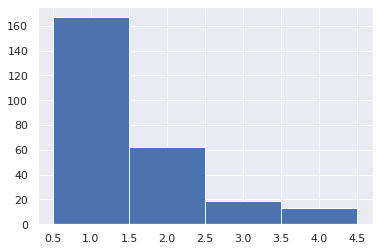

In [178]:
plt.hist(list(counter_btwn.values()),  bins= np.linspace(0.5,4.5,5))

a differenza della connettività i nodi con maggiore bwtn cambiano nel tempo

In [157]:
max(list(counter_btwn.values()))

3

#####  pagerank

In [170]:
top_100_pr = pd.DataFrame({'30_days' : measures_30_days.sort_values('pagerank')['name'].values[-100:],
                            '15_days' : measures_first_2_week.sort_values('pagerank')['name'].values[-100:],
                            '7_days' : measures_7_days.sort_values('pagerank')['name'].values[-100:],
                            '3_days' : measures_3_days.sort_values('pagerank')['name'].values[-100:]})

In [168]:
counter_pr = Counter(np.concatenate([i for i in top_20_pr.values]))

(array([187.,  48.,  27.,   9.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5]),
 <a list of 4 Patch objects>)

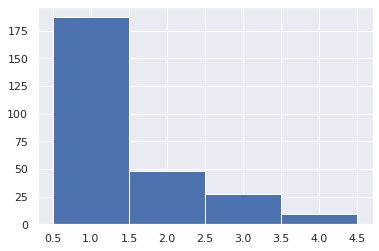

In [169]:
plt.hist(list(counter_pr.values()),  bins= np.linspace(0.5,4.5,5))

#####  clustering coefficient

In [171]:
top_100_cc = pd.DataFrame({'30_days' : measures_30_days.sort_values('local_transitivity')['name'].values[-100:],
                            '15_days' : measures_first_2_week.sort_values('local_transitivity')['name'].values[-100:],
                            '7_days' : measures_7_days.sort_values('local_transitivity')['name'].values[-100:],
                            '3_days' : measures_3_days.sort_values('local_transitivity')['name'].values[-100:]})

(array([22., 11.,  8.,  3.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5]),
 <a list of 4 Patch objects>)

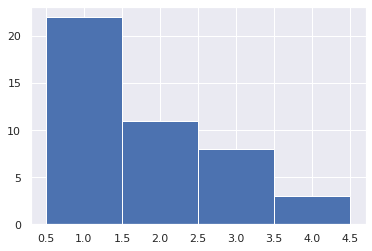

In [166]:
counter_pr = Counter(np.concatenate([i for i in top_20_pr.values]))
plt.hist(list(counter_pr.values()),  bins= np.linspace(0.5,4.5,5))

##### Outdegree

In [172]:
top_100_k = pd.DataFrame({'30_days' : measures_30_days.sort_values('outdegree')['name'].values[-100:],
                            '15_days' : measures_first_2_week.sort_values('outdegree')['name'].values[-100:],
                            '7_days' : measures_7_days.sort_values('outdegree')['name'].values[-100:],
                            '3_days' : measures_3_days.sort_values('outdegree')['name'].values[-100:]})

(array([63., 33., 17., 55.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5]),
 <a list of 4 Patch objects>)

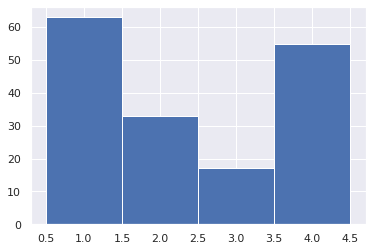

In [164]:
counter_k = Counter(np.concatenate([i for i in top_20_k.values]))
plt.hist(list(counter_k.values()),  bins= np.linspace(0.5,4.5,5))

##  Community Detection

In [183]:
help(graph)

Help on function graph in module __main__:

graph(fini_day, init_day=0)



In [3]:
#ricarivo dati e funzione graph()
data_retweet = pd.read_csv('data_retweet')

In [6]:
g_3 = graph(3)
g_7 = graph(7)
g_15 = graph(15)
g_30 = graph(30)


In [7]:
g_3.summary()

'IGRAPH DNW- 7787 14003 -- \n+ attr: name (v), weight (e)'

In [9]:
g_3.to_undirected(combine_edges='sum')
cl_3 = g_3.community_multilevel(weights='weight',return_levels=False)

In [10]:
g_3.vs['membership'] = cl_3.membership

In [90]:
g_7.to_undirected(combine_edges='sum')
cl_7 = g_7.community_multilevel(weights='weight',return_levels=False)
g_15.to_undirected(combine_edges='sum')
cl_15 = g_15.community_multilevel(weights='weight',return_levels=False)
g_30.to_undirected(combine_edges='sum')
cl_30 = g_30.community_multilevel(weights='weight',return_levels=False)

In [91]:
g_7.vs['membership'] = cl_7.membership
g_15.vs['membership'] = cl_15.membership
g_30.vs['membership'] = cl_30.membership

In [92]:
print(max(cl_3.membership),
     max(cl_7.membership),
     max(cl_15.membership),
     max(cl_30.membership))
print(len(g_3.vs),
     len(g_7.vs),
     len(g_15.vs),
     len(g_30.vs),)

523 1057 1742 3021
7787 21350 51366 106770


Guardo come cambiano le community dei leader

In [38]:
#guardo i 100 con degree più alto in ogni set di misure
top_100_retweeted  = measures_30_days.sort_values('outdegree')['name'].values[-100:]

In [40]:
measures_30_days.sort_values('outdegree')['outdegree'].values[-100:]

array([ 845,  850,  858,  862,  865,  878,  879,  895,  899,  921,  927,
        937,  951,  956,  980,  987,  998, 1006, 1014, 1017, 1025, 1047,
       1052, 1060, 1062, 1080, 1088, 1097, 1117, 1139, 1139, 1141, 1144,
       1156, 1172, 1192, 1192, 1201, 1204, 1210, 1214, 1214, 1222, 1250,
       1278, 1297, 1299, 1300, 1341, 1366, 1405, 1417, 1432, 1493, 1494,
       1495, 1495, 1499, 1522, 1568, 1579, 1583, 1621, 1628, 1678, 1686,
       1727, 1753, 1755, 1763, 1777, 1790, 1794, 1868, 1994, 2027, 2089,
       2174, 2183, 2257, 2320, 2350, 2492, 2496, 3036, 3109, 3120, 3272,
       3468, 3591, 3634, 4129, 4301, 5451, 5598, 6212, 6896, 7060, 8758,
       9146])

quanti di questi sono nella giant component

In [43]:
giant30= cl_30.giant()